# AIWC: OpenCL-based Architecture-Independent Workload Characterization

This artifact has been submitted for reproducibility of the presented AIWC features.
The second part of this artefact outlines how AIWC can be invoked from within Jupyter, this is due to Docker installing all dependencies for AIWC -- in Oclgrind -- and The Extended OpenDwarfs Benchmark Suite. If you have any questions please don't hesitate to contact me (via email)<beau@inbeta.org>.


##Reproducibility

In [1]:
%load_ext rpy2.ipython

In [2]:
%%R -o featdata.all -o featdata.lud

library('gridGraphics')
library('cowplot')
source('./analysis_tools/kiviat_plotter.R')
load('./analysis_tools/newfeat.Rdf')
source('./analysis_tools/restructure_aiwc_data.R')

featdata.all <- drop_metrics_for_simple_kiviat(featdata.all)
featdata.kmeans <- subset(featdata.all,application=="kmeans")
featdata.lud    <- subset(featdata.all,application=="lud")
featdata.csr    <- subset(featdata.all,application=="csr")
featdata.fft    <- subset(featdata.all,application=="fft")
featdata.gem    <- subset(featdata.all,application=="gem")
featdata.dwt    <- subset(featdata.all,application=="dwt")
featdata.srad   <- subset(featdata.all,application=="srad")
featdata.bfs    <- subset(featdata.all,application=="bfs")
featdata.hmm    <- subset(featdata.all,application=="hmm")
featdata.nw     <- subset(featdata.all,application=="nw")
featdata.crc    <- subset(featdata.all,application=="crc")

#source('./analysis_tools/stacked_features.R')


/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Loading required package: grid

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 

*******************************************************

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Note: cowplot does not change the default ggplot2 theme

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: anymore. To recover the previous behavior, execute:
  theme_set(theme_cowplot())

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: *******************************************************


  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: f

#Reproducibility -- Rebuild figures in the paper

Starting with the Kiviat diagrams, LUD Perimeter

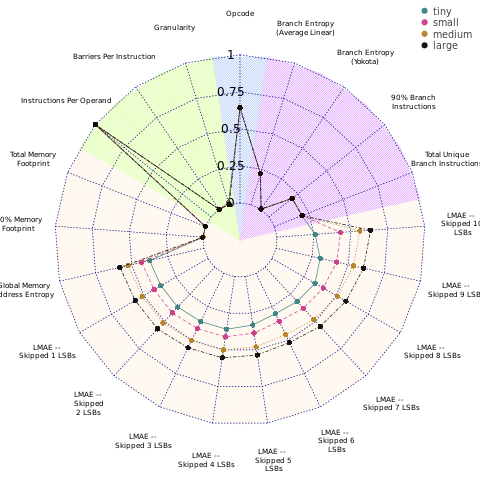

In [3]:
%%R -i featdata.lud featdata.all

x <- reorder_and_subset(featdata=featdata.lud,size='tiny',kernel="lud_perimeter")
x <- data.frame(t(colMeans(x)))
y <- x
x <- reorder_and_subset(featdata=featdata.lud,size='small',kernel="lud_perimeter")
x <- data.frame(t(colMeans(x)))
y <- rbind(y,x)
x <- reorder_and_subset(featdata=featdata.lud,size='medium',kernel="lud_perimeter")
x <- data.frame(t(colMeans(x)))
y <- rbind(y,x)
x <- reorder_and_subset(featdata=featdata.lud,size='large',kernel="lud_perimeter")
x <- data.frame(t(colMeans(x)))
y <- rbind(y,x)

nv <- subset(reorder_features(featdata.all),select=-c(size,kernel,application,invocation))
plot_kiviat(y,nv,colour="black",colour_spokes=TRUE,all_sizes=TRUE)

Selected AIWC metrics of the Lower-Upper Decomposition Internal kernel is shown below

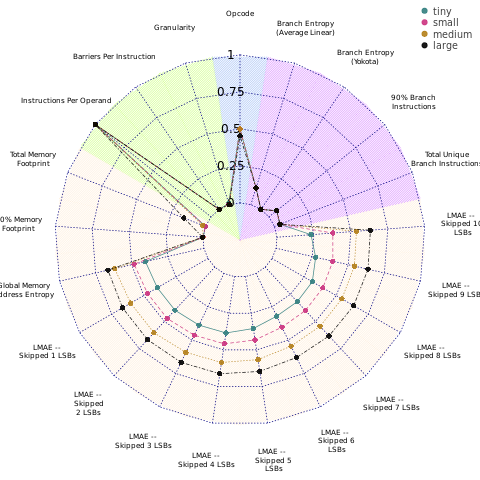

In [8]:
%%R -i featdata.lud

x <- reorder_and_subset(featdata=featdata.lud,size='tiny',kernel="lud_internal")
x <- data.frame(t(colMeans(x)))
y <- x
x <- reorder_and_subset(featdata=featdata.lud,size='small',kernel="lud_internal")
x <- data.frame(t(colMeans(x)))
y <- rbind(y,x)
x <- reorder_and_subset(featdata=featdata.lud,size='medium',kernel="lud_internal")
x <- data.frame(t(colMeans(x)))
y <- rbind(y,x)
x <- reorder_and_subset(featdata=featdata.lud,size='large',kernel="lud_internal")
x <- data.frame(t(colMeans(x)))
y <- rbind(y,x)

plot_kiviat(y,nv,colour="black",colour_spokes=TRUE,all_sizes=TRUE)

The LUD Diagonal kernel AWIC metrics are listed below

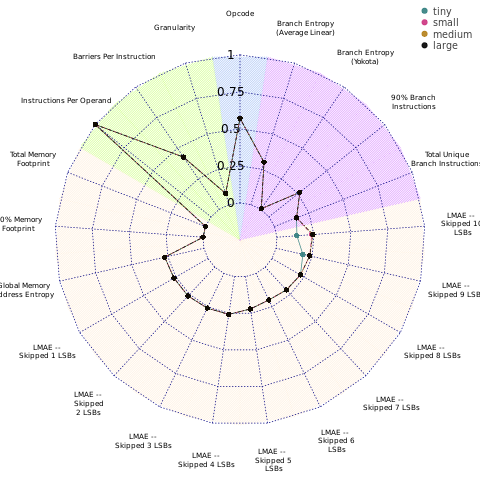

In [9]:
%%R -i featdata.lud

x <- reorder_and_subset(featdata=featdata.lud,size='tiny',kernel="lud_diagonal")
x <- data.frame(t(colMeans(x)))
y <- x
x <- reorder_and_subset(featdata=featdata.lud,size='small',kernel="lud_diagonal")
x <- data.frame(t(colMeans(x)))
y <- rbind(y,x)
x <- reorder_and_subset(featdata=featdata.lud,size='medium',kernel="lud_diagonal")
x <- data.frame(t(colMeans(x)))
y <- rbind(y,x)
x <- reorder_and_subset(featdata=featdata.lud,size='large',kernel="lud_diagonal")
x <- data.frame(t(colMeans(x)))
y <- rbind(y,x)

plot_kiviat(y,nv,colour="black",colour_spokes=TRUE,all_sizes=TRUE)

A closer examination of the Local Memory Access Entropy (LMAE) is presented with the following figure.

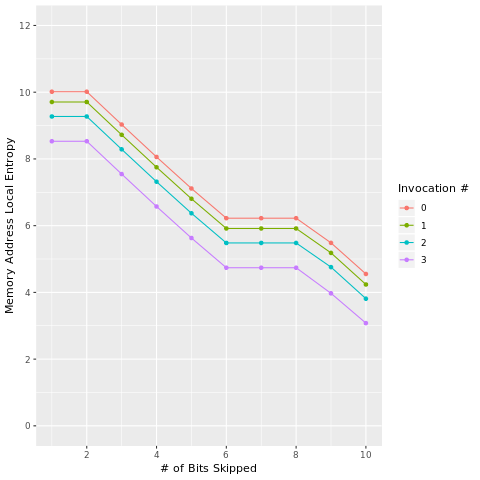

In [10]:
%%R -i featdata.lud

x <- featdata.lud[featdata.lud$size=='tiny' & featdata.lud$kernel == 'lud_perimeter',]
df <- data.frame()
for (invocation in unique(x$invocation)){
    y <- x[x$invocation==invocation,]
    lmae.lsbs <- c()
    lmae.entropy <- c()
    for (i in seq(1,10)){
        lmae.lsbs <- c(lmae.lsbs, i)
        lmae.entropy <- c(lmae.entropy, y[which(y$metric == paste("local memory address entropy -- ",i," LSBs skipped",sep='')),]$count)
    }
    df <- rbind(df, data.frame(invocation=invocation,lsbs=lmae.lsbs,entropy=lmae.entropy))
}
library(ggplot2)
df_plot <- ggplot(dat=df,aes(x=lsbs,y=entropy,colour=invocation)) +
    geom_line() +
    geom_point() +
    labs(x = "# of Bits Skipped", y = "Memory Address Local Entropy", colour="Invocation #") +
    scale_y_continuous(breaks=seq(0,12,by=2),limit=c(0,12)) +
    scale_x_continuous(breaks=seq(0,10,by=2))
df_plot

Finally, the figure showing the selection of 4 AIWC metrics over Extended OpenDwarfs kernels is presented below.

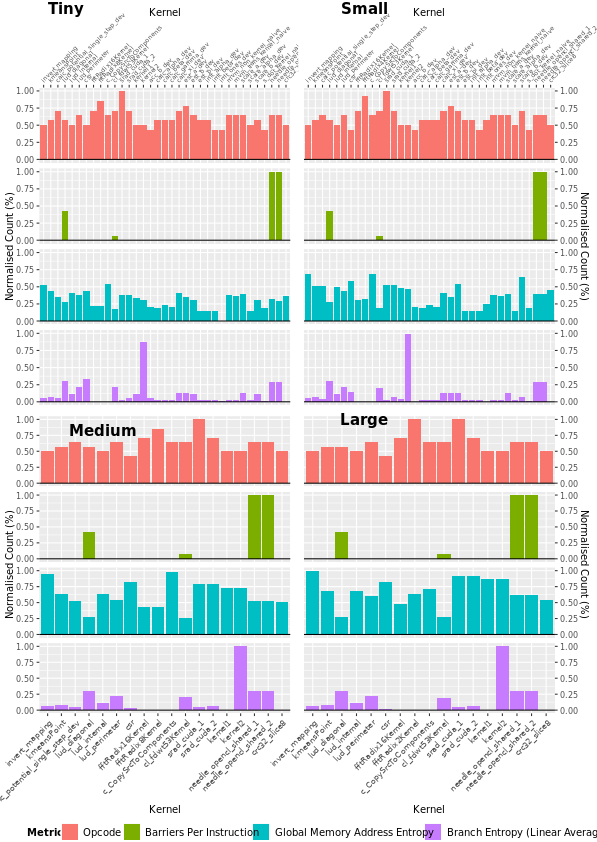

In [13]:
%%R -i featdata.all -w 8.3 -h 11.7 -u in

full_dat <- reorder_features(featdata.all)

#min-max normalization
normalize <- function(x) {
    return ((x - min(x)) / (max(x) - min(x)))
}

full_dat$opcode <- normalize(full_dat$opcode)
full_dat$barriers_per_instruction <- normalize(full_dat$barriers_per_instruction)
full_dat$global_memory_address_entropy <- normalize(full_dat$global_memory_address_entropy)
full_dat$branch_entropy_average_linear <- normalize(full_dat$branch_entropy_average_linear)

group.colours <- c(rgb(100, 149, 237, 127, maxColorValue=255),#compute category (cornflowerblue)
                   rgb(173, 255,  47, 127, maxColorValue=255),#parallelism (greenyellow)
                   rgb(255, 228, 196, 255, maxColorValue=255),#memory (bisque)
                   rgb(191,  62, 255, 127, maxColorValue=255))#branch (darkorchid1)

y <- data.frame()

for(j in unique(full_dat$kernel)){
    for(i in unique(full_dat$size)){
        x <- subset(full_dat, kernel == j & size == i)
        if(nrow(x) == 0){
            next
        }

        y <- rbind(y,
                   data.frame('kernel'=j,
                              'size'=i,
                              'metric'='Opcode',
                              'value'=median(x$opcode)),
                   data.frame('kernel'=j,
                              'size'=i,
                              'metric'='Barriers Per Instruction',
                              'value'=median(x$barriers_per_instruction)),
                   data.frame('kernel'=j,
                              'size'=i,
                              'metric'='Global Memory Address Entropy',
                              'value'=median(x$global_memory_address_entropy)),
                   data.frame('kernel'=j,
                              'size'=i,
                              'metric'='Branch Entropy (Linear Average)',
                              'value'=median(x$branch_entropy_average_linear)))
    }
}

for(s in c('tiny','small','medium','large')){
    z <- subset(y,size==s)

    p <- ggplot(z, aes(x = kernel, y = value, fill=metric)) +
        geom_histogram(stat = 'identity', binwidth = 1) +
        facet_grid(metric ~ ., margins = FALSE, scales = "fixed") +
        labs(x="Kernel",y="Normalised Count (%)",fill="Metric")+
        #theme_minimal() +
        annotate("segment", x=-Inf, xend=Inf, y=0, yend=0)+
        coord_cartesian() +
        theme(strip.placement='outside',
              strip.background=element_blank(),
              strip.text.y=element_blank(),
              axis.text.x = element_text(angle = 45, hjust = 1, size = 8),
              axis.text.y = element_text(size = 8),
              axis.title.x = element_text(size=10),
              axis.title.y = element_text(size=10),
              legend.position = "none")

    if(s == 'tiny')
        p <- p + scale_x_discrete(position = 'top') + theme(axis.text.x = element_text(angle = 45, hjust = 0, vjust=0, size = 6))
    if(s == 'small')
        p <- p + scale_y_continuous(position = 'right') + scale_x_discrete(position = 'top') + theme(axis.text.x = element_text(angle = 45, hjust = 0, vjust=0, size = 6))
    if(s == 'medium')
        p <- p + scale_y_continuous(position = 'left') + scale_x_discrete(position = 'bottom')
    if(s == 'large')
        p <- p + scale_y_continuous(position = 'right') + scale_x_discrete(position = 'bottom')
    #and save p for safe keeping -- maybe for some later cowplot
    assign(paste('stacked_',s,sep=''),p)
}

legend_generic <- get_legend(stacked_tiny + theme(legend.title=element_text(face="bold",size=10),
                                                  legend.text=element_text(size=10),
                                                  legend.position="bottom",
                                                  legend.justification="right",
                                                  legend.direction="horizontal"))
plots <- align_plots(stacked_tiny  ,
                     stacked_small ,
                     stacked_medium,
                     stacked_large)
                     #align="hv",axis="tblr")

xoff <- .22 # relative x position of label, within one plot
yoff <- .98 # relative y position of label, within one plot

x <- plot_grid(plot_grid(plots[[1]],plots[[2]],ncol=2,align="h")+ draw_plot_label(label=c("Tiny",  "Small"), x=(xoff+0:1)/2,y=rep(1-(1-yoff),2),
                                                                                 hjust=.5,vjust=.5,size=15),
               plot_grid(plots[[3]],plots[[4]],ncol=2,align="h")+draw_plot_label(label=c("
               Medium",  "Large"), x=(xoff+0:1)/2, y=rep(1-(1-yoff),2),hjust=.5,vjust=.5,size=15),
               legend_generic,
               rel_heights=c(1,1,.05),
               nrow=3)
print(x)


##Further Analysis

This section briefly outlines how to incorporate AIWC into the analysis of your own OpenCL codes.
Firstly, within this Docker container the `oclgrind` tool has been included into your environment path -- as `$OCLGRIND_BIN`.
Since AIWC is a plugin to `oclgrind`, it is run as an argument `--workload-characterisation` to `oclgrind` taking the form of:

In [19]:
! $OCLGRIND_BIN --workload-characterisation ls


AIWC-figures.ipynb  Dockerfile	README.md  analysis_tools


Of course, `ls` doesn't use OpenCL and thus doesn't tell us anything meaningful. However, oclgrind is prepended to any OpenCL binary of your choice.
The full range of Extended OpenDwarfs (EOD) benchmark suite is also included for your convenience if you want to examine AIWC characteristics of any of these OpenCL codes.
AIWC is run on one such application like so:

In [25]:
%cd /OpenDwarfs/build
! $OCLGRIND_BIN --workload-characterisation ./csr -i ../test/sparse-linear-algebra/SPMV/tiny
%cd /aiwc-evaluation

/OpenDwarfs/build
Opt.optimized = 0 
CPU was selected
Platform Chosen : University of Bristol
Number of available devices: 1
Device Chosen : Oclgrind Simulator
***** LSB_Init >csr< writing to >lsb.csr.r0< *****
Reading Input from '../test/sparse-linear-algebra/SPMV/tiny'
Kernel #1: 'spmv_kernel'

Device type is Default
Kernel file spmv_kernel.cl: Defines =  -DOPENCL -I. 
Executing with WG Size #1 of 1: 32...
Working kernel memory: 31.628906KiB
Architecture-Independent Workload Characterization of kernel: csr
+----------------------------------------------------------------------------+
|Compute Opcode Instruction Histogram                                        |
+============================================================================+
instruction: getelementptr count: 11040
instruction: br count: 8832
instruction: call count: 3680
instruction: load count: 11040
instruction: icmp count: 4416
instruction: zext count: 6624
instruction: phi count: 7360
instruction: store count: 736
i

The Architecture-Independent Workload Characterisation was written to file: aiwc_csr_2.csv
Architecture-Independent Workload Characterization of kernel: csr
+----------------------------------------------------------------------------+
|Compute Opcode Instruction Histogram                                        |
+============================================================================+
instruction: getelementptr count: 11040
instruction: br count: 8832
instruction: call count: 3680
instruction: load count: 11040
instruction: icmp count: 4416
instruction: zext count: 6624
instruction: and count: 736
instruction: ret count: 736
instruction: trunc count: 736
instruction: add count: 3680
instruction: store count: 736
instruction: phi count: 7360
+----------------------------------------------------------------------------+
|Compute Opcode Unique Opcodes required to cover 90% of Dynamic Instructions |
+============================================================================+
Unique

total number of memory accesses = 11776
90% of memory accesses:10599
Number of unique memory addresses that cover 90% of memory accesses: 6911
+----------------------------------------------------------------------------------------------+
|Global Memory Address Entropy -- Measure of the randomness of memory addresses                |
+==============================================================================================+
12.7275
+----------------------------------------------------------------------------------------------+
|Local Memory Address Entropy -- Measure of the spatial locality of memory addresses           |
+==============================================================================================+
LSBs skipped	Entropy (bits)
1		12.7275
2		12.7275
3		11.7502
4		10.7625
5		9.77034
6		8.77542
7		7.78804
8		6.79827
9		5.83934
10		4.87678
+-------------------------------------------------------------------------------------------------------+
|Unique Branch Instruc

Architecture-Independent Workload Characterization of kernel: csr
+----------------------------------------------------------------------------+
|Compute Opcode Instruction Histogram                                        |
+============================================================================+
instruction: getelementptr count: 11040
instruction: br count: 8832
instruction: call count: 3680
instruction: load count: 11040
instruction: icmp count: 4416
instruction: zext count: 6624
instruction: and count: 736
instruction: ret count: 736
instruction: trunc count: 736
instruction: add count: 3680
instruction: store count: 736
instruction: phi count: 7360
+----------------------------------------------------------------------------+
|Compute Opcode Unique Opcodes required to cover 90% of Dynamic Instructions |
+============================================================================+
Unique Op Codes comprising of 90% of dynamic instructions:
	getelementptr
	load
	br
	phi
	zext
	i

Architecture-Independent Workload Characterization of kernel: csr
+----------------------------------------------------------------------------+
|Compute Opcode Instruction Histogram                                        |
+============================================================================+
instruction: getelementptr count: 11040
instruction: br count: 8832
instruction: call count: 3680
instruction: load count: 11040
instruction: icmp count: 4416
instruction: zext count: 6624
instruction: and count: 736
instruction: ret count: 736
instruction: trunc count: 736
instruction: add count: 3680
instruction: store count: 736
instruction: phi count: 7360
+----------------------------------------------------------------------------+
|Compute Opcode Unique Opcodes required to cover 90% of Dynamic Instructions |
+============================================================================+
Unique Op Codes comprising of 90% of dynamic instructions:
	getelementptr
	load
	br
	phi
	zext
	i

Architecture-Independent Workload Characterization of kernel: csr
+----------------------------------------------------------------------------+
|Compute Opcode Instruction Histogram                                        |
+============================================================================+
instruction: getelementptr count: 11040
instruction: br count: 8832
instruction: call count: 3680
instruction: load count: 11040
instruction: icmp count: 4416
instruction: zext count: 6624
instruction: and count: 736
instruction: ret count: 736
instruction: trunc count: 736
instruction: add count: 3680
instruction: store count: 736
instruction: phi count: 7360
+----------------------------------------------------------------------------+
|Compute Opcode Unique Opcodes required to cover 90% of Dynamic Instructions |
+============================================================================+
Unique Op Codes comprising of 90% of dynamic instructions:
	getelementptr
	load
	br
	phi
	zext
	i

The Architecture-Independent Workload Characterisation was written to file: aiwc_csr_16.csv
Architecture-Independent Workload Characterization of kernel: csr
+----------------------------------------------------------------------------+
|Compute Opcode Instruction Histogram                                        |
+============================================================================+
instruction: getelementptr count: 11040
instruction: br count: 8832
instruction: call count: 3680
instruction: load count: 11040
instruction: icmp count: 4416
instruction: zext count: 6624
instruction: and count: 736
instruction: ret count: 736
instruction: trunc count: 736
instruction: add count: 3680
instruction: store count: 736
instruction: phi count: 7360
+----------------------------------------------------------------------------+
|Compute Opcode Unique Opcodes required to cover 90% of Dynamic Instructions |
+============================================================================+
Uniqu

2		12.7275
3		11.7502
4		10.7625
5		9.77034
6		8.77542
7		7.78804
8		6.79827
9		5.83934
10		4.87678
+-------------------------------------------------------------------------------------------------------+
|Unique Branch Instructions -- Total number of unique branch instructions to cover 90% of the branches|
+=======================================================================================================+
Branch At Line	Count (hit and miss)
21		3680
13		736
Number of unique branches that cover 90% of all branch instructions: 2
+-------------------------------------------------------------------------------------------------------+
|Branch Entropy -- Measure of the randomness of branch behaviour, representing branch predicability     |
+=======================================================================================================+
Using a branch history of 16
Yokota Branch Entropy: 1694.17
Yokota Branch Entropy Per Workload: 2.31128
Average Linear Branch Entropy: 0.33424

Architecture-Independent Workload Characterization of kernel: csr
+----------------------------------------------------------------------------+
|Compute Opcode Instruction Histogram                                        |
+============================================================================+
instruction: getelementptr count: 11040
instruction: br count: 8832
instruction: call count: 3680
instruction: load count: 11040
instruction: icmp count: 4416
instruction: zext count: 6624
instruction: and count: 736
instruction: ret count: 736
instruction: trunc count: 736
instruction: add count: 3680
instruction: store count: 736
instruction: phi count: 7360
+----------------------------------------------------------------------------+
|Compute Opcode Unique Opcodes required to cover 90% of Dynamic Instructions |
+============================================================================+
Unique Op Codes comprising of 90% of dynamic instructions:
	getelementptr
	load
	br
	phi
	zext
	i

Architecture-Independent Workload Characterization of kernel: csr
+----------------------------------------------------------------------------+
|Compute Opcode Instruction Histogram                                        |
+============================================================================+
instruction: getelementptr count: 11040
instruction: br count: 8832
instruction: call count: 3680
instruction: load count: 11040
instruction: icmp count: 4416
instruction: zext count: 6624
instruction: and count: 736
instruction: ret count: 736
instruction: trunc count: 736
instruction: add count: 3680
instruction: store count: 736
instruction: phi count: 7360
+----------------------------------------------------------------------------+
|Compute Opcode Unique Opcodes required to cover 90% of Dynamic Instructions |
+============================================================================+
Unique Op Codes comprising of 90% of dynamic instructions:
	getelementptr
	load
	br
	phi
	zext
	i

The Architecture-Independent Workload Characterisation was written to file: aiwc_csr_27.csv
Architecture-Independent Workload Characterization of kernel: csr
+----------------------------------------------------------------------------+
|Compute Opcode Instruction Histogram                                        |
+============================================================================+
instruction: getelementptr count: 11040
instruction: br count: 8832
instruction: call count: 3680
instruction: load count: 11040
instruction: icmp count: 4416
instruction: zext count: 6624
instruction: and count: 736
instruction: ret count: 736
instruction: trunc count: 736
instruction: add count: 3680
instruction: store count: 736
instruction: phi count: 7360
+----------------------------------------------------------------------------+
|Compute Opcode Unique Opcodes required to cover 90% of Dynamic Instructions |
+============================================================================+
Uniqu

Architecture-Independent Workload Characterization of kernel: csr
+----------------------------------------------------------------------------+
|Compute Opcode Instruction Histogram                                        |
+============================================================================+
instruction: getelementptr count: 11040
instruction: br count: 8832
instruction: call count: 3680
instruction: load count: 11040
instruction: icmp count: 4416
instruction: zext count: 6624
instruction: and count: 736
instruction: ret count: 736
instruction: trunc count: 736
instruction: add count: 3680
instruction: store count: 736
instruction: phi count: 7360
+----------------------------------------------------------------------------+
|Compute Opcode Unique Opcodes required to cover 90% of Dynamic Instructions |
+============================================================================+
Unique Op Codes comprising of 90% of dynamic instructions:
	getelementptr
	load
	br
	phi
	zext
	i

Architecture-Independent Workload Characterization of kernel: csr
+----------------------------------------------------------------------------+
|Compute Opcode Instruction Histogram                                        |
+============================================================================+
instruction: getelementptr count: 11040
instruction: br count: 8832
instruction: call count: 3680
instruction: load count: 11040
instruction: icmp count: 4416
instruction: zext count: 6624
instruction: and count: 736
instruction: ret count: 736
instruction: trunc count: 736
instruction: add count: 3680
instruction: store count: 736
instruction: phi count: 7360
+----------------------------------------------------------------------------+
|Compute Opcode Unique Opcodes required to cover 90% of Dynamic Instructions |
+============================================================================+
Unique Op Codes comprising of 90% of dynamic instructions:
	getelementptr
	load
	br
	phi
	zext
	i

Architecture-Independent Workload Characterization of kernel: csr
+----------------------------------------------------------------------------+
|Compute Opcode Instruction Histogram                                        |
+============================================================================+
instruction: getelementptr count: 11040
instruction: br count: 8832
instruction: call count: 3680
instruction: load count: 11040
instruction: icmp count: 4416
instruction: zext count: 6624
instruction: and count: 736
instruction: ret count: 736
instruction: trunc count: 736
instruction: add count: 3680
instruction: store count: 736
instruction: phi count: 7360
+----------------------------------------------------------------------------+
|Compute Opcode Unique Opcodes required to cover 90% of Dynamic Instructions |
+============================================================================+
Unique Op Codes comprising of 90% of dynamic instructions:
	getelementptr
	load
	br
	phi
	zext
	i

5		9.77034
6		8.77542
7		7.78804
8		6.79827
9		5.83934
10		4.87678
+-------------------------------------------------------------------------------------------------------+
|Unique Branch Instructions -- Total number of unique branch instructions to cover 90% of the branches|
+=======================================================================================================+
Branch At Line	Count (hit and miss)
21		3680
13		736
Number of unique branches that cover 90% of all branch instructions: 2
+-------------------------------------------------------------------------------------------------------+
|Branch Entropy -- Measure of the randomness of branch behaviour, representing branch predicability     |
+=======================================================================================================+
Using a branch history of 16
Yokota Branch Entropy: 1694.17
Yokota Branch Entropy Per Workload: 2.31128
Average Linear Branch Entropy: 0.334245
The Architecture-Independent Wo

12.7275
+----------------------------------------------------------------------------------------------+
|Local Memory Address Entropy -- Measure of the spatial locality of memory addresses           |
+==============================================================================================+
LSBs skipped	Entropy (bits)
1		12.7276
2		12.7276
3		11.7502
4		10.7625
5		9.77034
6		8.77542
7		7.78804
8		6.79827
9		5.83934
10		4.87678
+-------------------------------------------------------------------------------------------------------+
|Unique Branch Instructions -- Total number of unique branch instructions to cover 90% of the branches|
+=======================================================================================================+
Branch At Line	Count (hit and miss)
21		3680
13		736
Number of unique branches that cover 90% of all branch instructions: 2
+-------------------------------------------------------------------------------------------------------+
|Branch Entropy 

Architecture-Independent Workload Characterization of kernel: csr
+----------------------------------------------------------------------------+
|Compute Opcode Instruction Histogram                                        |
+============================================================================+
instruction: getelementptr count: 11040
instruction: br count: 8832
instruction: call count: 3680
instruction: load count: 11040
instruction: icmp count: 4416
instruction: zext count: 6624
instruction: and count: 736
instruction: ret count: 736
instruction: trunc count: 736
instruction: add count: 3680
instruction: store count: 736
instruction: phi count: 7360
+----------------------------------------------------------------------------+
|Compute Opcode Unique Opcodes required to cover 90% of Dynamic Instructions |
+============================================================================+
Unique Op Codes comprising of 90% of dynamic instructions:
	getelementptr
	load
	br
	phi
	zext
	i

Architecture-Independent Workload Characterization of kernel: csr
+----------------------------------------------------------------------------+
|Compute Opcode Instruction Histogram                                        |
+============================================================================+
instruction: getelementptr count: 11040
instruction: br count: 8832
instruction: call count: 3680
instruction: load count: 11040
instruction: icmp count: 4416
instruction: zext count: 6624
instruction: and count: 736
instruction: ret count: 736
instruction: trunc count: 736
instruction: add count: 3680
instruction: store count: 736
instruction: phi count: 7360
+----------------------------------------------------------------------------+
|Compute Opcode Unique Opcodes required to cover 90% of Dynamic Instructions |
+============================================================================+
Unique Op Codes comprising of 90% of dynamic instructions:
	getelementptr
	load
	br
	phi
	zext
	i

Architecture-Independent Workload Characterization of kernel: csr
+----------------------------------------------------------------------------+
|Compute Opcode Instruction Histogram                                        |
+============================================================================+
instruction: getelementptr count: 11040
instruction: br count: 8832
instruction: call count: 3680
instruction: load count: 11040
instruction: icmp count: 4416
instruction: zext count: 6624
instruction: and count: 736
instruction: ret count: 736
instruction: trunc count: 736
instruction: add count: 3680
instruction: store count: 736
instruction: phi count: 7360
+----------------------------------------------------------------------------+
|Compute Opcode Unique Opcodes required to cover 90% of Dynamic Instructions |
+============================================================================+
Unique Op Codes comprising of 90% of dynamic instructions:
	getelementptr
	load
	br
	phi
	zext
	i

Architecture-Independent Workload Characterization of kernel: csr
+----------------------------------------------------------------------------+
|Compute Opcode Instruction Histogram                                        |
+============================================================================+
instruction: getelementptr count: 11040
instruction: br count: 8832
instruction: call count: 3680
instruction: load count: 11040
instruction: icmp count: 4416
instruction: zext count: 6624
instruction: and count: 736
instruction: ret count: 736
instruction: trunc count: 736
instruction: add count: 3680
instruction: store count: 736
instruction: phi count: 7360
+----------------------------------------------------------------------------+
|Compute Opcode Unique Opcodes required to cover 90% of Dynamic Instructions |
+============================================================================+
Unique Op Codes comprising of 90% of dynamic instructions:
	getelementptr
	load
	br
	phi
	zext
	i

The Architecture-Independent Workload Characterisation was written to file: aiwc_csr_55.csv
Architecture-Independent Workload Characterization of kernel: csr
+----------------------------------------------------------------------------+
|Compute Opcode Instruction Histogram                                        |
+============================================================================+
instruction: getelementptr count: 11040
instruction: br count: 8832
instruction: call count: 3680
instruction: load count: 11040
instruction: icmp count: 4416
instruction: zext count: 6624
instruction: and count: 736
instruction: ret count: 736
instruction: trunc count: 736
instruction: add count: 3680
instruction: store count: 736
instruction: phi count: 7360
+----------------------------------------------------------------------------+
|Compute Opcode Unique Opcodes required to cover 90% of Dynamic Instructions |
+============================================================================+
Uniqu

The Architecture-Independent Workload Characterisation was written to file: aiwc_csr_58.csv
Architecture-Independent Workload Characterization of kernel: csr
+----------------------------------------------------------------------------+
|Compute Opcode Instruction Histogram                                        |
+============================================================================+
instruction: getelementptr count: 11040
instruction: br count: 8832
instruction: call count: 3680
instruction: load count: 11040
instruction: icmp count: 4416
instruction: zext count: 6624
instruction: and count: 736
instruction: ret count: 736
instruction: trunc count: 736
instruction: add count: 3680
instruction: store count: 736
instruction: phi count: 7360
+----------------------------------------------------------------------------+
|Compute Opcode Unique Opcodes required to cover 90% of Dynamic Instructions |
+============================================================================+
Uniqu

3		11.7502
4		10.7625
5		9.77034
6		8.77542
7		7.78804
8		6.79827
9		5.83934
10		4.87678
+-------------------------------------------------------------------------------------------------------+
|Unique Branch Instructions -- Total number of unique branch instructions to cover 90% of the branches|
+=======================================================================================================+
Branch At Line	Count (hit and miss)
21		3680
13		736
Number of unique branches that cover 90% of all branch instructions: 2
+-------------------------------------------------------------------------------------------------------+
|Branch Entropy -- Measure of the randomness of branch behaviour, representing branch predicability     |
+=======================================================================================================+
Using a branch history of 16
Yokota Branch Entropy: 1694.17
Yokota Branch Entropy Per Workload: 2.31128
Average Linear Branch Entropy: 0.334245
The Archi

Architecture-Independent Workload Characterization of kernel: csr
+----------------------------------------------------------------------------+
|Compute Opcode Instruction Histogram                                        |
+============================================================================+
instruction: getelementptr count: 11040
instruction: br count: 8832
instruction: call count: 3680
instruction: load count: 11040
instruction: icmp count: 4416
instruction: zext count: 6624
instruction: and count: 736
instruction: ret count: 736
instruction: trunc count: 736
instruction: add count: 3680
instruction: store count: 736
instruction: phi count: 7360
+----------------------------------------------------------------------------+
|Compute Opcode Unique Opcodes required to cover 90% of Dynamic Instructions |
+============================================================================+
Unique Op Codes comprising of 90% of dynamic instructions:
	getelementptr
	load
	br
	phi
	zext
	i

Architecture-Independent Workload Characterization of kernel: csr
+----------------------------------------------------------------------------+
|Compute Opcode Instruction Histogram                                        |
+============================================================================+
instruction: getelementptr count: 11040
instruction: br count: 8832
instruction: call count: 3680
instruction: load count: 11040
instruction: icmp count: 4416
instruction: zext count: 6624
instruction: and count: 736
instruction: ret count: 736
instruction: trunc count: 736
instruction: add count: 3680
instruction: store count: 736
instruction: phi count: 7360
+----------------------------------------------------------------------------+
|Compute Opcode Unique Opcodes required to cover 90% of Dynamic Instructions |
+============================================================================+
Unique Op Codes comprising of 90% of dynamic instructions:
	getelementptr
	load
	br
	phi
	zext
	i

Architecture-Independent Workload Characterization of kernel: csr
+----------------------------------------------------------------------------+
|Compute Opcode Instruction Histogram                                        |
+============================================================================+
instruction: getelementptr count: 11040
instruction: br count: 8832
instruction: call count: 3680
instruction: load count: 11040
instruction: icmp count: 4416
instruction: zext count: 6624
instruction: and count: 736
instruction: ret count: 736
instruction: trunc count: 736
instruction: add count: 3680
instruction: store count: 736
instruction: phi count: 7360
+----------------------------------------------------------------------------+
|Compute Opcode Unique Opcodes required to cover 90% of Dynamic Instructions |
+============================================================================+
Unique Op Codes comprising of 90% of dynamic instructions:
	getelementptr
	load
	br
	phi
	zext
	i

6		8.77542
7		7.78804
8		6.79827
9		5.83934
10		4.87678
+-------------------------------------------------------------------------------------------------------+
|Unique Branch Instructions -- Total number of unique branch instructions to cover 90% of the branches|
+=======================================================================================================+
Branch At Line	Count (hit and miss)
21		3680
13		736
Number of unique branches that cover 90% of all branch instructions: 2
+-------------------------------------------------------------------------------------------------------+
|Branch Entropy -- Measure of the randomness of branch behaviour, representing branch predicability     |
+=======================================================================================================+
Using a branch history of 16
Yokota Branch Entropy: 1694.17
Yokota Branch Entropy Per Workload: 2.31128
Average Linear Branch Entropy: 0.334245
The Architecture-Independent Workload Char

3		11.7502
4		10.7625
5		9.77034
6		8.77542
7		7.78804
8		6.79827
9		5.83934
10		4.87678
+-------------------------------------------------------------------------------------------------------+
|Unique Branch Instructions -- Total number of unique branch instructions to cover 90% of the branches|
+=======================================================================================================+
Branch At Line	Count (hit and miss)
21		3680
13		736
Number of unique branches that cover 90% of all branch instructions: 2
+-------------------------------------------------------------------------------------------------------+
|Branch Entropy -- Measure of the randomness of branch behaviour, representing branch predicability     |
+=======================================================================================================+
Using a branch history of 16
Yokota Branch Entropy: 1694.17
Yokota Branch Entropy Per Workload: 2.31128
Average Linear Branch Entropy: 0.334245
The Archi

8088
+----------------------------------------------------------------------------------------------+
|90% Memory Footprint -- Number of unique memory addresses that cover 90% of memory accesses   |
+==============================================================================================+
total number of memory accesses = 11776
90% of memory accesses:10599
Number of unique memory addresses that cover 90% of memory accesses: 6911
+----------------------------------------------------------------------------------------------+
|Global Memory Address Entropy -- Measure of the randomness of memory addresses                |
+==============================================================================================+
12.7275
+----------------------------------------------------------------------------------------------+
|Local Memory Address Entropy -- Measure of the spatial locality of memory addresses           |
+===================================================================

Architecture-Independent Workload Characterization of kernel: csr
+----------------------------------------------------------------------------+
|Compute Opcode Instruction Histogram                                        |
+============================================================================+
instruction: getelementptr count: 11040
instruction: br count: 8832
instruction: call count: 3680
instruction: load count: 11040
instruction: icmp count: 4416
instruction: zext count: 6624
instruction: and count: 736
instruction: ret count: 736
instruction: trunc count: 736
instruction: add count: 3680
instruction: store count: 736
instruction: phi count: 7360
+----------------------------------------------------------------------------+
|Compute Opcode Unique Opcodes required to cover 90% of Dynamic Instructions |
+============================================================================+
Unique Op Codes comprising of 90% of dynamic instructions:
	getelementptr
	load
	br
	phi
	zext
	i

Architecture-Independent Workload Characterization of kernel: csr
+----------------------------------------------------------------------------+
|Compute Opcode Instruction Histogram                                        |
+============================================================================+
instruction: getelementptr count: 11040
instruction: br count: 8832
instruction: call count: 3680
instruction: load count: 11040
instruction: icmp count: 4416
instruction: zext count: 6624
instruction: and count: 736
instruction: ret count: 736
instruction: trunc count: 736
instruction: add count: 3680
instruction: store count: 736
instruction: phi count: 7360
+----------------------------------------------------------------------------+
|Compute Opcode Unique Opcodes required to cover 90% of Dynamic Instructions |
+============================================================================+
Unique Op Codes comprising of 90% of dynamic instructions:
	getelementptr
	load
	br
	phi
	zext
	i

Architecture-Independent Workload Characterization of kernel: csr
+----------------------------------------------------------------------------+
|Compute Opcode Instruction Histogram                                        |
+============================================================================+
instruction: getelementptr count: 11040
instruction: br count: 8832
instruction: call count: 3680
instruction: load count: 11040
instruction: icmp count: 4416
instruction: zext count: 6624
instruction: and count: 736
instruction: ret count: 736
instruction: trunc count: 736
instruction: add count: 3680
instruction: store count: 736
instruction: phi count: 7360
+----------------------------------------------------------------------------+
|Compute Opcode Unique Opcodes required to cover 90% of Dynamic Instructions |
+============================================================================+
Unique Op Codes comprising of 90% of dynamic instructions:
	getelementptr
	load
	br
	phi
	zext
	i

The Architecture-Independent Workload Characterisation was written to file: aiwc_csr_89.csv
Architecture-Independent Workload Characterization of kernel: csr
+----------------------------------------------------------------------------+
|Compute Opcode Instruction Histogram                                        |
+============================================================================+
instruction: getelementptr count: 11040
instruction: br count: 8832
instruction: call count: 3680
instruction: load count: 11040
instruction: icmp count: 4416
instruction: zext count: 6624
instruction: and count: 736
instruction: ret count: 736
instruction: trunc count: 736
instruction: add count: 3680
instruction: store count: 736
instruction: phi count: 7360
+----------------------------------------------------------------------------+
|Compute Opcode Unique Opcodes required to cover 90% of Dynamic Instructions |
+============================================================================+
Uniqu

The Architecture-Independent Workload Characterisation was written to file: aiwc_csr_92.csv
Architecture-Independent Workload Characterization of kernel: csr
+----------------------------------------------------------------------------+
|Compute Opcode Instruction Histogram                                        |
+============================================================================+
instruction: getelementptr count: 11040
instruction: br count: 8832
instruction: call count: 3680
instruction: load count: 11040
instruction: icmp count: 4416
instruction: zext count: 6624
instruction: and count: 736
instruction: ret count: 736
instruction: trunc count: 736
instruction: add count: 3680
instruction: store count: 736
instruction: phi count: 7360
+----------------------------------------------------------------------------+
|Compute Opcode Unique Opcodes required to cover 90% of Dynamic Instructions |
+============================================================================+
Uniqu

1		12.7275
2		12.7275
3		11.7502
4		10.7625
5		9.77033
6		8.77542
7		7.78804
8		6.79827
9		5.83934
10		4.87678
+-------------------------------------------------------------------------------------------------------+
|Unique Branch Instructions -- Total number of unique branch instructions to cover 90% of the branches|
+=======================================================================================================+
Branch At Line	Count (hit and miss)
21		3680
13		736
Number of unique branches that cover 90% of all branch instructions: 2
+-------------------------------------------------------------------------------------------------------+
|Branch Entropy -- Measure of the randomness of branch behaviour, representing branch predicability     |
+=======================================================================================================+
Using a branch history of 16
Yokota Branch Entropy: 1694.17
Yokota Branch Entropy Per Workload: 2.31128
Average Linear Branch Entro

Architecture-Independent Workload Characterization of kernel: csr
+----------------------------------------------------------------------------+
|Compute Opcode Instruction Histogram                                        |
+============================================================================+
instruction: getelementptr count: 11040
instruction: br count: 8832
instruction: call count: 3680
instruction: load count: 11040
instruction: icmp count: 4416
instruction: zext count: 6624
instruction: and count: 736
instruction: ret count: 736
instruction: trunc count: 736
instruction: add count: 3680
instruction: store count: 736
instruction: phi count: 7360
+----------------------------------------------------------------------------+
|Compute Opcode Unique Opcodes required to cover 90% of Dynamic Instructions |
+============================================================================+
Unique Op Codes comprising of 90% of dynamic instructions:
	getelementptr
	load
	br
	phi
	zext
	i

Architecture-Independent Workload Characterization of kernel: csr
+----------------------------------------------------------------------------+
|Compute Opcode Instruction Histogram                                        |
+============================================================================+
instruction: getelementptr count: 11040
instruction: br count: 8832
instruction: call count: 3680
instruction: load count: 11040
instruction: icmp count: 4416
instruction: zext count: 6624
instruction: and count: 736
instruction: ret count: 736
instruction: trunc count: 736
instruction: add count: 3680
instruction: store count: 736
instruction: phi count: 7360
+----------------------------------------------------------------------------+
|Compute Opcode Unique Opcodes required to cover 90% of Dynamic Instructions |
+============================================================================+
Unique Op Codes comprising of 90% of dynamic instructions:
	getelementptr
	load
	br
	phi
	zext
	i

Architecture-Independent Workload Characterization of kernel: csr
+----------------------------------------------------------------------------+
|Compute Opcode Instruction Histogram                                        |
+============================================================================+
instruction: getelementptr count: 11040
instruction: br count: 8832
instruction: call count: 3680
instruction: load count: 11040
instruction: icmp count: 4416
instruction: zext count: 6624
instruction: and count: 736
instruction: ret count: 736
instruction: trunc count: 736
instruction: add count: 3680
instruction: store count: 736
instruction: phi count: 7360
+----------------------------------------------------------------------------+
|Compute Opcode Unique Opcodes required to cover 90% of Dynamic Instructions |
+============================================================================+
Unique Op Codes comprising of 90% of dynamic instructions:
	getelementptr
	load
	br
	phi
	zext
	i

Architecture-Independent Workload Characterization of kernel: csr
+----------------------------------------------------------------------------+
|Compute Opcode Instruction Histogram                                        |
+============================================================================+
instruction: getelementptr count: 11040
instruction: br count: 8832
instruction: call count: 3680
instruction: load count: 11040
instruction: icmp count: 4416
instruction: zext count: 6624
instruction: and count: 736
instruction: ret count: 736
instruction: trunc count: 736
instruction: add count: 3680
instruction: store count: 736
instruction: phi count: 7360
+----------------------------------------------------------------------------+
|Compute Opcode Unique Opcodes required to cover 90% of Dynamic Instructions |
+============================================================================+
Unique Op Codes comprising of 90% of dynamic instructions:
	getelementptr
	load
	br
	phi
	zext
	i

Architecture-Independent Workload Characterization of kernel: csr
+----------------------------------------------------------------------------+
|Compute Opcode Instruction Histogram                                        |
+============================================================================+
instruction: getelementptr count: 11040
instruction: br count: 8832
instruction: call count: 3680
instruction: load count: 11040
instruction: icmp count: 4416
instruction: zext count: 6624
instruction: and count: 736
instruction: ret count: 736
instruction: trunc count: 736
instruction: add count: 3680
instruction: store count: 736
instruction: phi count: 7360
+----------------------------------------------------------------------------+
|Compute Opcode Unique Opcodes required to cover 90% of Dynamic Instructions |
+============================================================================+
Unique Op Codes comprising of 90% of dynamic instructions:
	getelementptr
	load
	br
	phi
	zext
	i

The output of AIWC metrics for each kernel invocation can be found in:

In [26]:
! ls /OpenDwarfs/build/aiwc_csr_*.csv

/OpenDwarfs/build/aiwc_csr_0.csv    /OpenDwarfs/build/aiwc_csr_5.csv
/OpenDwarfs/build/aiwc_csr_1.csv    /OpenDwarfs/build/aiwc_csr_50.csv
/OpenDwarfs/build/aiwc_csr_10.csv   /OpenDwarfs/build/aiwc_csr_51.csv
/OpenDwarfs/build/aiwc_csr_100.csv  /OpenDwarfs/build/aiwc_csr_52.csv
/OpenDwarfs/build/aiwc_csr_101.csv  /OpenDwarfs/build/aiwc_csr_53.csv
/OpenDwarfs/build/aiwc_csr_102.csv  /OpenDwarfs/build/aiwc_csr_54.csv
/OpenDwarfs/build/aiwc_csr_103.csv  /OpenDwarfs/build/aiwc_csr_55.csv
/OpenDwarfs/build/aiwc_csr_104.csv  /OpenDwarfs/build/aiwc_csr_56.csv
/OpenDwarfs/build/aiwc_csr_105.csv  /OpenDwarfs/build/aiwc_csr_57.csv
/OpenDwarfs/build/aiwc_csr_106.csv  /OpenDwarfs/build/aiwc_csr_58.csv
/OpenDwarfs/build/aiwc_csr_107.csv  /OpenDwarfs/build/aiwc_csr_59.csv
/OpenDwarfs/build/aiwc_csr_108.csv  /OpenDwarfs/build/aiwc_csr_6.csv
/OpenDwarfs/build/aiwc_csr_109.csv  /OpenDwarfs/build/aiwc_csr_60.csv
/OpenDwarfs/build/aiwc_csr_11.csv   /OpenDwarfs/build/aiwc_csr_61.csv
/OpenDwarfs/build/aiwc

Please, feel free to check out any of these applications. The arguments to execute any of these binaries can be identified by examining:

In [24]:
! cat /OpenDwarfs/opendwarf_grinder.py

#/usr/bin/env python
from opendwarf_miner_utils import *

from sys import argv,exit
selected_applications = None

oclgrind = ''
if os.environ['OCLGRIND_BIN'] == '':
    oclgrind = 'oclgrind'
else:
    oclgrind = os.environ['OCLGRIND_BIN']

if len(argv) == 2:
    selected_applications = str(argv[1])
    print("Running Oclgrind on application:"+selected_applications)

#Benchmark parameters:
kmeans = {'name':'kmeans',
          'alias':'kmeans',
          'default':'-i ../test/mapreduce/kmeans/65536_34f.txt',
          'tiny':'-g -f 30 -p 256',     #< 32K, object increments of 1KiB
          'small':'-g -f 30 -p 2048',   #< 256K, object increments of 8KiB
          'medium':'-g -f 30 -p 65600', #< 8196K, object increments of 256KiB
          'large':'-g -f 30 -p 131072', #> 8196K, object increments of 2048KiB
          'full name':'K-Means Clustering'}
kmeans_coarse_iteration_profile = {
        'name':'kmeans_profiling_outer_loop',
        'alias':'kmeans',
        'default':'-i ../test/